In [2]:
import numpy as np

In [3]:
class Grid:
    def __init__(self, file_name: str = "example1.input.txt") -> None:
        self.guard_type = None
        self.grid = self.parse_map(file_name)
        self.guard = self.find_guard()

    def parse_map(self, file_name: str) -> np.ndarray:
        grid = []
        with open(file_name, "r", encoding="utf-8") as fin:
            for raw_line in [l for l in fin if len(l.strip()) > 0]:
                line = [c for c in raw_line.strip()]
                grid.append(line)
        return np.array(grid)

    def find_guard(self) -> tuple:
        if self.guard_type is None:
            self.guard_type = "^"
        r = np.where(self.grid == self.guard_type)
        if len(r[0]) > 0:
            return tuple((r[0][0], r[1][0]))

    def move_guard(self) -> None:
        pos = self.guard
        y, x = self.grid.shape
        if self.guard_type == "^":
            if pos[0] > 0:
                if self.grid[pos[0] - 1][pos[1]] == "#":
                    self.guard_type = ">"
                    self.grid[pos[0]][pos[1]] = self.guard_type
                else:
                    self.grid[pos[0] - 1][pos[1]] = "^"
                    self.grid[pos[0]][pos[1]] = "X"
            else:
                self.grid[pos[0]][pos[1]] = "X"
        elif self.guard_type == ">":
            if pos[1] < y - 1:
                if self.grid[pos[0]][pos[1] + 1] == "#":
                    self.guard_type = "v"
                    self.grid[pos[0]][pos[1]] = self.guard_type
                else:
                    self.grid[pos[0]][pos[1] + 1] = ">"
                    self.grid[pos[0]][pos[1]] = "X"
            else:
                self.grid[pos[0]][pos[1]] = "X"
        elif self.guard_type == "v":
            if pos[0] < x - 1:
                if self.grid[pos[0] + 1][pos[1]] == "#":
                    self.guard_type = "<"
                    self.grid[pos[0]][pos[1]] = self.guard_type
                else:
                    self.grid[pos[0] + 1][pos[1]] = "v"
                    self.grid[pos[0]][pos[1]] = "X"
            else:
                self.grid[pos[0]][pos[1]] = "X"
        elif self.guard_type == "<":
            if pos[1] > 0:
                if self.grid[pos[0]][pos[1] - 1] == "#":
                    self.guard_type = "^"
                    self.grid[pos[0]][pos[1]] = self.guard_type
                else:
                    self.grid[pos[0]][pos[1] - 1] = "<"
                    self.grid[pos[0]][pos[1]] = "X"
            else:
                self.grid[pos[0]][pos[1]] = "X"
    
    def get_guard(self):
        return self.guard

    def get_grid(self):
        return self.grid
    
    def set_guard(self):
        self.guard = self.find_guard()

In [4]:
g = Grid("example1.input.txt")
print(g.get_grid())

[['.' '.' '.' '.' '#' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '#']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '#' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '#' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '#' '.' '.' '^' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '#' '.']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '#' '.' '.' '.']]


In [5]:
g.get_grid()[0][4] == "#"

True

In [6]:
from IPython.display import display, clear_output

print(g.get_grid())
guard = g.get_guard()
while guard:
    g.move_guard()
    g.set_guard()
    guard = g.get_guard()
print(g.get_grid())
print(np.count_nonzero(g.get_grid() == "X"))

[['.' '.' '.' '.' '#' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '#']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '#' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '#' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '#' '.' '.' '^' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '#' '.']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '#' '.' '.' '.']]
[['.' '.' '.' '.' '#' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'X' 'X' 'X' 'X' 'X' '#']
 ['.' '.' '.' '.' 'X' '.' '.' '.' 'X' '.']
 ['.' '.' '#' '.' 'X' '.' '.' '.' 'X' '.']
 ['.' '.' 'X' 'X' 'X' 'X' 'X' '#' 'X' '.']
 ['.' '.' 'X' '.' 'X' '.' 'X' '.' 'X' '.']
 ['.' '#' 'X' 'X' 'X' 'X' 'X' 'X' 'X' '.']
 ['.' 'X' 'X' 'X' 'X' 'X' 'X' 'X' '#' '.']
 ['#' 'X' 'X' 'X' 'X' 'X' 'X' 'X' '.' '.']
 ['.' '.' '.' '.' '.' '.' '#' 'X' '.' '.']]
41


In [7]:
# Part 1
g = Grid("input.txt")
print(g.get_grid())
guard = g.get_guard()
while guard:
    g.move_guard()
    g.set_guard()
    guard = g.get_guard()
print(g.get_grid())
print(np.count_nonzero(g.get_grid() == "X"))

[['#' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '#']
 ['.' '.' '.' ... '.' '.' '.']
 ...
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['#' '.' '.' ... '.' '.' '.']]
[['#' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '#']
 ['.' '.' '.' ... '.' '.' '.']
 ...
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['#' '.' '.' ... '.' '.' '.']]
4758


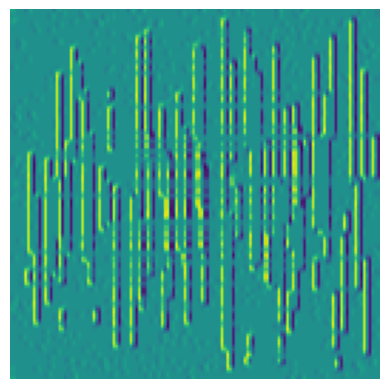

In [12]:
from scipy import ndimage
import matplotlib.pyplot as plt

# edges = ndimage.sobel(g.get_grid())

num_grid = np.array([[ord(c) for c in word] for word in g.get_grid()])
# print(num_grid)
edges = ndimage.sobel(num_grid)
plt.imshow(edges)
plt.axis("off")
plt.show()